In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud


In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jdanz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jdanz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jdanz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Entendimiento del negocio. 

Se desea construir un modelo de aprendizaje automático supervisado para una posterior implementación en un chatbot

# Entendimiento de los Datos 

In [3]:
# Cargamos los datos. 
datatxt = pd.read_csv('../Datos/Dataset_Prueba.csv', encoding='utf-8', sep=',')

In [4]:
datatxt.head()

,Tipo,Descripción,Respuesta
0,Petición,Solicito restablecer mi contraseña.,Se ha enviado un enlace de restablecimiento al...
1,Queja,No recibí soporte técnico en el horario acordado.,"Lamentamos el inconveniente, estamos investiga..."
2,Reclamo,El equipo entregado no corresponde al solicitado.,"Por favor, envíe fotografías del equipo recibi..."
3,Petición,Necesito información sobre las políticas de pr...,Puede consultar nuestras políticas en el sigui...
4,Queja,El sistema presenta errores frecuentes al inic...,Estamos revisando el problema y le notificarem...


In [5]:
datatxt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tipo         6 non-null      object
 1   Descripción  6 non-null      object
 2   Respuesta    6 non-null      object
dtypes: object(3)
memory usage: 276.0+ bytes


In [6]:
# Exploración básica del dataset
print(f"Forma del dataset: {datatxt.shape}")
print(f"Primeras 5 filas:")
print(datatxt.head())

# Verificar valores nulos
print(f"Valores nulos: {datatxt.isnull().sum().sum()}")

Forma del dataset: (6, 3)
Primeras 5 filas:
       Tipo                                        Descripción  \
0  Petición                Solicito restablecer mi contraseña.   
1     Queja  No recibí soporte técnico en el horario acordado.   
2   Reclamo  El equipo entregado no corresponde al solicitado.   
3  Petición  Necesito información sobre las políticas de pr...   
4     Queja  El sistema presenta errores frecuentes al inic...   

                                           Respuesta  
0  Se ha enviado un enlace de restablecimiento al...  
1  Lamentamos el inconveniente, estamos investiga...  
2  Por favor, envíe fotografías del equipo recibi...  
3  Puede consultar nuestras políticas en el sigui...  
4  Estamos revisando el problema y le notificarem...  
Valores nulos: 0


In [7]:
# Cantidad de palabras 
print(f"Cantidad de palabras: {datatxt['Tipo'].str.split().str.len().sum()}")
# Cantidad de palabras por fila
print(f"Cantidad de palabras por fila: {datatxt['Tipo'].str.split().str.len().mean()}")
# Cantidad de filas
print(f"Cantidad de filas: {datatxt.shape[0]}")
# Cantidad de columnas
print(f"Cantidad de columnas: {datatxt.shape[1]}")

Cantidad de palabras: 6
Cantidad de palabras por fila: 1.0
Cantidad de filas: 6
Cantidad de columnas: 3


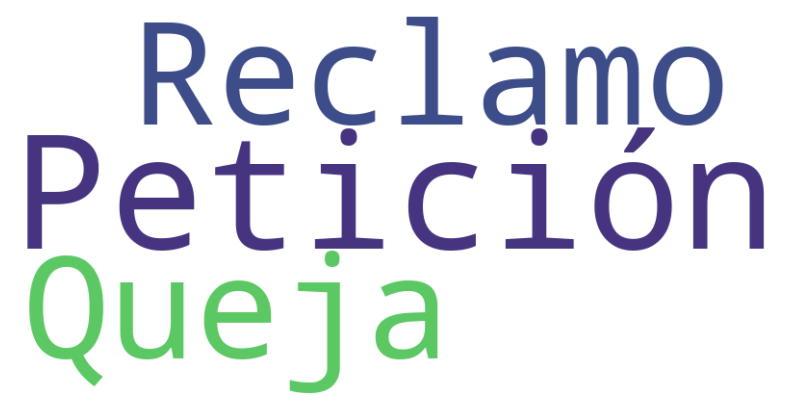

In [8]:
# Nube de palabras

def plot_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
text = ' '.join(datatxt['Tipo'].astype(str))
plot_wordcloud(text)

# Preprocesamiento de los datos 

In [9]:
datatxt_copy = datatxt.copy()

In [10]:
spanish_stopwords = nltk.corpus.stopwords.words('spanish')

# Función para limpiar el texto
def limpiar_texto(texto):
    if pd.isna(texto):
        return ""
    texto = texto.lower().strip()  # Minúsculas y espacios
    texto = re.sub(r'[^\w\s]', '', texto)  # Quitar puntuación
    tokens = word_tokenize(texto)  # Tokenizar
    tokens_limpios = [word for word in tokens if word not in spanish_stopwords]  # Quitar stopwords
    return " ".join(tokens_limpios)

# Aplicar limpieza a la columna Descripción
datatxt_copy["Descripción_Limpiada"] = datatxt_copy["Descripción"].apply(limpiar_texto)

# Guardar el DataFrame limpio en un nuevo archivo CSV
datatxt_copy.to_csv('../Datos/Dataset_Prueba_Limpio.csv', index=False, encoding='utf-8-sig')

# Modelado

In [11]:
# Cargar el dataset limpio
datatxt_limpio = pd.read_csv('../Datos/Dataset_Prueba_Limpio.csv', encoding='utf-8-sig')

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Variables para ML
X = datatxt_limpio["Descripción_Limpiada"]  # Entrada
y = datatxt_limpio["Tipo"]  # Etiqueta

# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline sin stopwords
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        min_df=1,
        max_df=1.0,
        sublinear_tf=True,
        use_idf=True,
        ngram_range=(1, 1),
        stop_words=None        # Sin filtrado de palabras vacías
    )),
    ('svm', SVC(
        C=1.0,
        kernel='linear',
        probability=True
    ))
])

print("\nEntrenando sin filtrado de stopwords...")
pipeline.fit(X_train, y_train)


Entrenando sin filtrado de stopwords...


Pipeline(steps=[('tfidf', TfidfVectorizer(sublinear_tf=True)),
                ('svm', SVC(kernel='linear', probability=True))])

# Validación

=== Evaluación del Modelo SVM ===
Exactitud (Accuracy): 0.0000
Precisión ponderada: 0.0000
Recall ponderado: 0.0000
F1-Score ponderado: 0.0000

Reporte de clasificación detallado:
              precision    recall  f1-score   support

    Petición       0.00      0.00      0.00       1.0
       Queja       0.00      0.00      0.00       1.0
     Reclamo       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



c:\Users\jdanz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jdanz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jdanz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

<Figure size 1000x800 with 0 Axes>

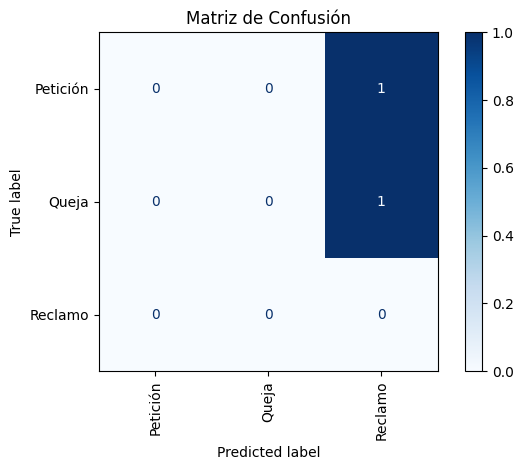

In [13]:
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix,
    precision_recall_fscore_support,
    roc_curve, 
    auc,
    ConfusionMatrixDisplay
)
# 1. Predicciones en conjunto de prueba
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)

# 2. Métricas básicas
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print("=== Evaluación del Modelo SVM ===")
print(f"Exactitud (Accuracy): {accuracy:.4f}")
print(f"Precisión ponderada: {precision:.4f}")
print(f"Recall ponderado: {recall:.4f}")
print(f"F1-Score ponderado: {f1:.4f}")
print("\nReporte de clasificación detallado:")
print(classification_report(y_test, y_pred))

# 3. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
labels = sorted(y.unique())
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cm_display.plot(cmap='Blues', values_format='d', xticks_rotation='vertical')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()

In [14]:
# 1. Verificar los datos
print("\n=== DIAGNÓSTICO DEL PROBLEMA ===")
print(f"Número de ejemplos de entrenamiento: {len(X_train)}")
print(f"Número de ejemplos de prueba: {len(X_test)}")

# Verificar si hay textos vacíos
empty_train = sum(X_train.apply(lambda x: str(x).strip() == ''))
empty_test = sum(X_test.apply(lambda x: str(x).strip() == ''))
print(f"Textos vacíos en entrenamiento: {empty_train} ({empty_train/len(X_train)*100:.2f}%)")
print(f"Textos vacíos en prueba: {empty_test} ({empty_test/len(X_test)*100:.2f}%)")

# 2. Verificar las clases
print("\n=== Distribución de clases ===")
print("Entrenamiento:")
print(y_train.value_counts())
print("\nPrueba:")
print(y_test.value_counts())

# 3. Verificar la salida del vectorizador
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, max_df=1.0)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print(f"\nDimensiones de matriz TF-IDF entrenamiento: {X_train_vec.shape}")
print(f"Dimensiones de matriz TF-IDF prueba: {X_test_vec.shape}")
print(f"Número de características (vocabulario): {len(vectorizer.vocabulary_)}")

# 4. Verificar las predicciones
print("\n=== Análisis de predicciones ===")
print(f"Valores únicos en predicciones: {np.unique(y_pred)}")
print(f"Predicción más común: {pd.Series(y_pred).value_counts().index[0]}")
print(f"Porcentaje de la predicción más común: {pd.Series(y_pred).value_counts().iloc[0]/len(y_pred)*100:.2f}%")


=== DIAGNÓSTICO DEL PROBLEMA ===
Número de ejemplos de entrenamiento: 4
Número de ejemplos de prueba: 2
Textos vacíos en entrenamiento: 0 (0.00%)
Textos vacíos en prueba: 0 (0.00%)

=== Distribución de clases ===
Entrenamiento:
Tipo
Reclamo     2
Queja       1
Petición    1
Name: count, dtype: int64

Prueba:
Tipo
Petición    1
Queja       1
Name: count, dtype: int64

Dimensiones de matriz TF-IDF entrenamiento: (4, 18)
Dimensiones de matriz TF-IDF prueba: (2, 18)
Número de características (vocabulario): 18

=== Análisis de predicciones ===
Valores únicos en predicciones: ['Reclamo']
Predicción más común: Reclamo
Porcentaje de la predicción más común: 100.00%


In [15]:
# Guardar el modelo entrenado
import joblib
joblib.dump(pipeline, "../Modelos/modelo_svm.pkl")
print("Modelo guardado en 'modelo_svm.pkl'")

Modelo guardado en 'modelo_svm.pkl'


In [ ]:
# Cargar el modelo entrenado
modelo = joblib.load("../Modelos/modelo_svm.pkl")

# Stopwords en español
stop_words = set(stopwords.words('spanish'))

# Función para limpiar el texto (idéntica al preprocesamiento)
def limpiar_texto(texto):
    texto = texto.lower().strip()
    texto = re.sub(r'[^\w\s]', '', texto)
    tokens = word_tokenize(texto)
    tokens_limpios = [word for word in tokens if word not in stop_words]
    return " ".join(tokens_limpios)

# Respuestas por tipo
respuestas = {
    "Petición": "✅ Gracias por su petición. Será atendida lo antes posible.",
    "Queja": "⚠️ Lamentamos el inconveniente. Estamos trabajando para resolverlo.",
    "Reclamo": "📩 Entendemos su reclamo. Nos pondremos en contacto con usted."
}

# Chatbot interactivo en notebook
print("🧠 Chatbot activado. Escribe 'salir' para terminar.")

while True:
    entrada = input("Tú: ")
    if entrada.lower() == "salir":
        print("Chatbot: ¡Hasta luego!")
        break

    entrada_limpia = limpiar_texto(entrada)
    tipo_predicho = modelo.predict([entrada_limpia])[0]
    respuesta = respuestas.get(tipo_predicho, "🤖 Gracias por su mensaje. Lo analizaremos.")
    
    print(f"Chatbot ({tipo_predicho}): {respuesta}")

🧠 Chatbot activado en Jupyter Notebook. Escribe 'salir' para terminar.
Chatbot (Reclamo): 📩 Entendemos su reclamo. Nos pondremos en contacto con usted.
Chatbot (Reclamo): 📩 Entendemos su reclamo. Nos pondremos en contacto con usted.
Chatbot (Reclamo): 📩 Entendemos su reclamo. Nos pondremos en contacto con usted.
Chatbot (Reclamo): 📩 Entendemos su reclamo. Nos pondremos en contacto con usted.
